# Understanding Convolutions with PyTorch



# ESSOH Lath

In [6]:

# -*- coding: utf-8 -*-
# Deep Learning @ unistra
# Understanding convolutions
import torch
import torch.nn as nn

# *** 1D convolution  ***
# Example 1
conv = nn.Conv1d(1, 1, 3, bias=False)  # 1 channel, 1 kernel of size 3
conv.weight.size()

aaa = torch.randn(1, 1, 50)  # input: batch of size 1, 1 channel of size 50
output_1 = conv(aaa)
print("1D Convolution Output Shape:", output_1.size())

# Example 2
conv = nn.Conv1d(2, 16, 5, bias=False)  # 2 channels, 16 filters of size 3x3
bbb = torch.rand(1, 2, 64)
output_2 = conv(bbb)
print("1D Convolution with 2 channels Output Shape:", output_2.size())


1D Convolution Output Shape: torch.Size([1, 1, 48])
1D Convolution with 2 channels Output Shape: torch.Size([1, 16, 60])


In [8]:

# *** 2D convolution ***
# Example 1
ccc = torch.rand(1, 1, 32, 32)  # input: 1 batch, 1 channel, height 32, width 32
conv = nn.Conv2d(1, 1, (3, 3))  # 1 channel, 1 filter, filter size 3x3
output_3 = conv(ccc)
print("2D Convolution Output Shape:", output_3.size())

# Example 2
ddd = torch.rand(1, 20, 64, 128)  # 1 sample, 20 channels, height 64, width 128
conv = nn.Conv2d(20, 16, (3, 5))  # 20 channels, 16 filters, filter size 3x5
output_4 = conv(ddd)
print("2D Convolution with multiple channels Output Shape:", output_4.size())


2D Convolution Output Shape: torch.Size([1, 1, 30, 30])
2D Convolution with multiple channels Output Shape: torch.Size([1, 16, 62, 124])


## Exercises

In [12]:

# EX.1: Create the first convolutional layer of the AlexNet
# Input with 1 batch, 3 channels, height 227, width 227
alexnet_input = torch.rand(1, 3, 227, 227)
conv = nn.Conv2d(3, 96, kernel_size=11, stride=4)
alexnet_output = conv(alexnet_input)
print("AlexNet First Layer Output Shape:", alexnet_output.size())


AlexNet First Layer Output Shape: torch.Size([1, 96, 55, 55])


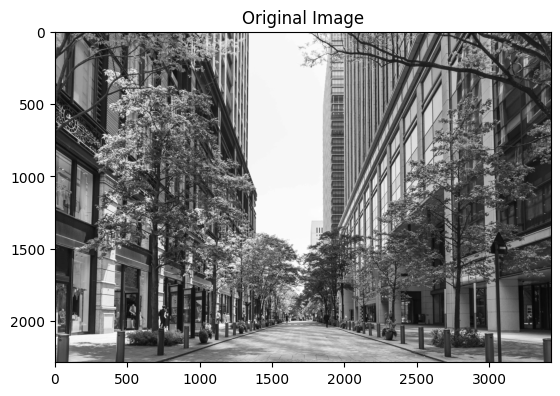

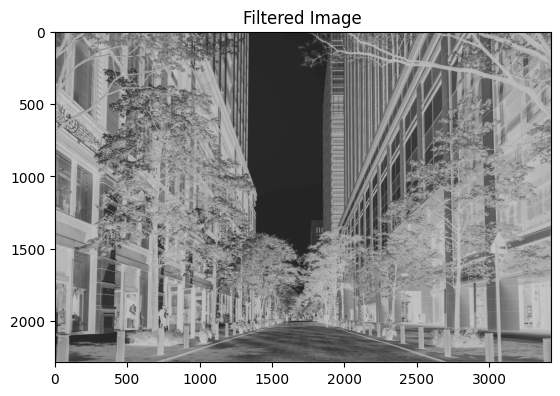

In [17]:

# EX.2: Apply a 3x3 filter on an image
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF

# Load and display an image 
image_path = 'ville-futur-enjeux.jpg'
image = Image.open(image_path).convert('L')  # Convert to grayscale
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.show()

# Convert image to tensor and apply filter
image_tensor = TF.to_tensor(image).unsqueeze(0)  # Add batch dimension
filter = torch.tensor([[0, 0, 0], [0, 1, 0], [-1, -2, -1]], dtype=torch.float32).unsqueeze(0).unsqueeze(0)
filtered_image = torch.nn.functional.conv2d(image_tensor, filter, padding=1)

# Display filtered image
plt.imshow(filtered_image.squeeze(0).squeeze(0), cmap='gray')
plt.title("Filtered Image")
plt.show()